# Ensembling (Regresión)
Author: **[Carl McBride Ellis](https://u-tad.com/claustro/carl-mcbride-ellis/)**

Vamos a combinar (*ensemble*) el modelo de regresión lineal con el árbol de decisión, y ver nuestro nueva *root mean square error* (RMSE).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [2]:
# nuestros parametros "beta"
b3 =  0.95
b2 =  6
b1 =  17
b0 =  10
x = np.arange(-5, 1, 0.1)

In [3]:
# fijar una "semilla"
np.random.seed(42)

In [4]:
df = pd.DataFrame(x, columns = ['x'])
df["y_true"] = b3*df["x"]**3  + b2*df["x"]**2 + b1*df["x"] + b0

# añadir un poco de ruido aleatorio
jitter = 1*(np.random.randn(60)-0.5)

df["y_true"] = df["y_true"]+jitter

## Regresión lineal

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(df["x"].values.reshape(-1, 1), df["y_true"])

df["y_pred_LR"] = regressor.predict(df["x"].values.reshape(-1, 1))

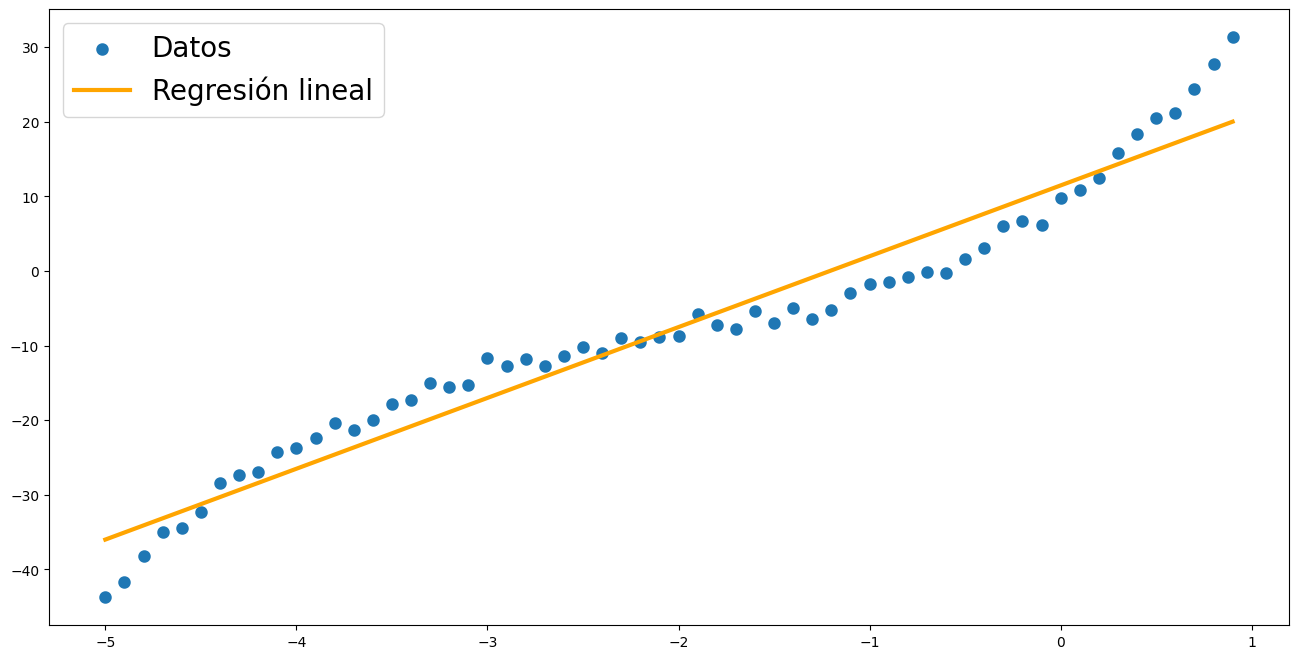

In [6]:
fig = plt.figure(figsize=(16, 8))
fig_1 = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig_1 = plt.plot(df["x"], df["y_pred_LR"] , lw=3, color="orange", label="Regresión lineal")
plt.legend(["Datos", "Regresión lineal"], loc ="upper left", fontsize=20);

In [7]:
#print("RMSE: ",mean_squared_error(df["y_true"], df["y_pred_LR"], squared=False))
print("RMSE: ",root_mean_squared_error(df["y_true"], df["y_pred_LR"]))

RMSE:  3.9626936844856644


## Árbol de decisión

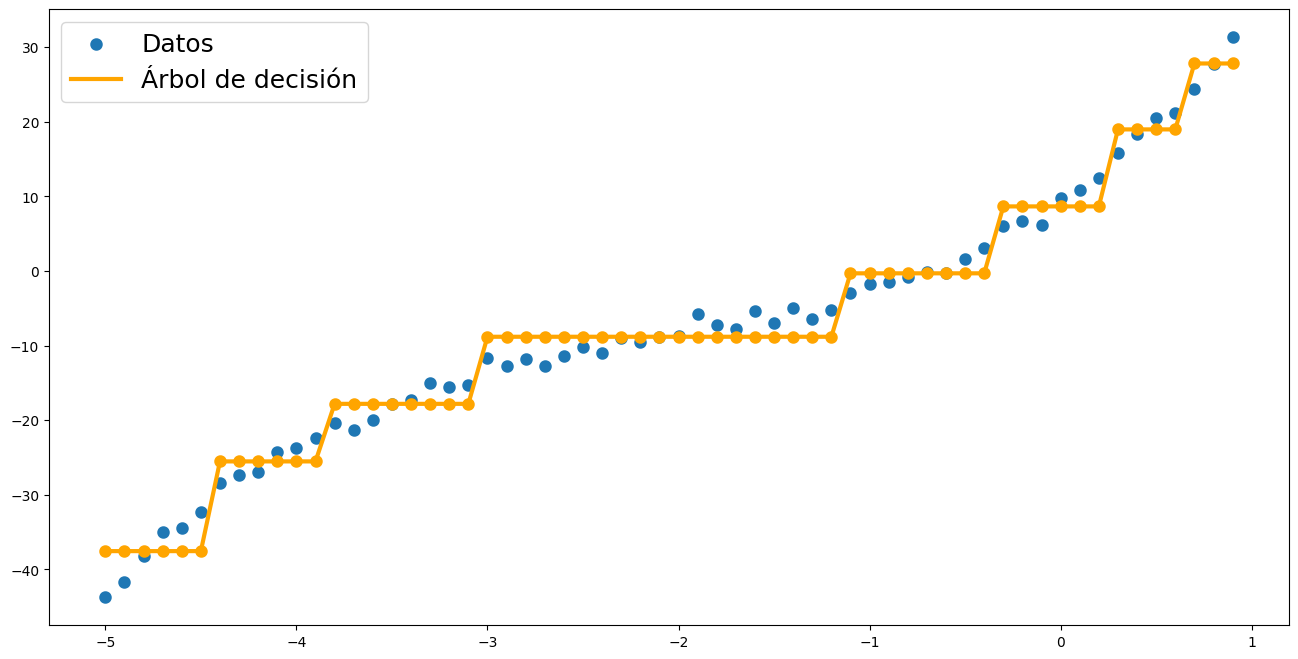

In [8]:
max_depth = 3

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=max_depth)

regressor.fit(df["x"].values.reshape(-1, 1), df["y_true"])

df["y_pred_DT"] = regressor.predict(df["x"].values.reshape(-1, 1))

fig = plt.figure(figsize=(16, 8))
fig = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig = plt.plot(df["x"], df["y_pred_DT"], lw=3, color="orange", label="Árbol de decisión")
fig = plt.scatter(df["x"], df["y_pred_DT"], lw=3, color="orange", label="Árbol de decisión")

plt.legend(["Datos", "Árbol de decisión"], loc ="upper left", fontsize=18);

In [9]:
#print("RMSE: ",mean_squared_error(df["y_true"], df["y_pred_DT"], squared=False))
print("RMSE: ",root_mean_squared_error(df["y_true"], df["y_pred_DT"]))

RMSE:  2.5914310275896475


# Ensemble el regresión lineal con el árbol de decisión

In [10]:
df["y_pred_E"] = np.mean(np.array([ df["y_pred_LR"] , df["y_pred_DT"], ]),axis=0)

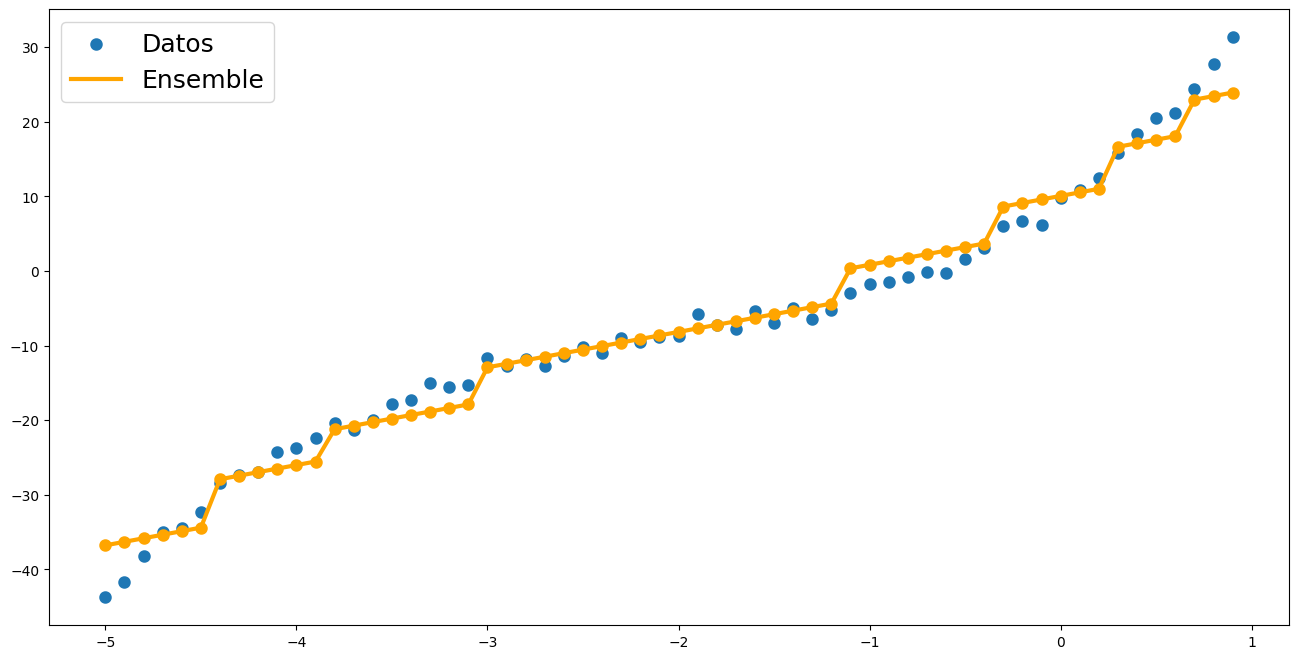

In [11]:
fig = plt.figure(figsize=(16, 8))
fig = plt.scatter(df["x"], df["y_true"], lw=3, label="Datos")
fig = plt.plot(df["x"], df["y_pred_E"], lw=3, color="orange", label="Árbol de decisión")
fig = plt.scatter(df["x"], df["y_pred_E"], lw=3, color="orange", label="Árbol de decisión")

plt.legend(["Datos", "Ensemble"], loc ="upper left", fontsize=18);

In [12]:
#print("RMSE: ",mean_squared_error(df["y_true"], df["y_pred_E"], squared=False))
print("RMSE: ",root_mean_squared_error(df["y_true"], df["y_pred_E"]))

RMSE:  2.3648257134333015


# Literatura recomendada
* [Kaggle Ensembling Guide](https://web.archive.org/web/20160304031055/http://mlwave.com/kaggle-ensembling-guide/)